In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [32]:
data = pd.read_csv("avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


## Data Preprocessing 

### 1. Data Cleaning

### 2. EDA (Analysis)

### 3. Finding and Treating Outliers (if any)

### 4. Feature Selection for model building

### 5. Model Building

### 6. Hyperparameter tuning



In [33]:
data.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [36]:
data.shape

(16468, 14)

In [37]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [38]:
# Fill missing values for numerical columns with the mean
data['AveragePrice'].fillna(data['AveragePrice'].mean(), inplace=True)
data['Total Volume'].fillna(data['Total Volume'].mean(), inplace=True)
data['4046'].fillna(data['4046'].mean(), inplace=True)
data['4225'].fillna(data['4225'].mean(), inplace=True)
data['4770'].fillna(data['4770'].mean(), inplace=True)
data['Total Bags'].fillna(data['Total Bags'].mean(), inplace=True)

In [39]:
# Fill missing values for categorical columns (if any) with mode
data['type'].fillna(data['type'].mode()[0], inplace=True)
data['region'].fillna(data['region'].mode()[0], inplace=True)

In [40]:
# Encode 'region' for classification
data['region_encoded'] = pd.factorize(data['region'])[0]

# Encode 'type' (conventional=0, organic=1)
data['type_encoded'] = data['type'].map({'conventional': 0, 'organic': 1})

In [41]:
# Drop unnecessary columns
data_cleaned = data.drop(columns=['Date', 'type', 'region','Unnamed: 0'])

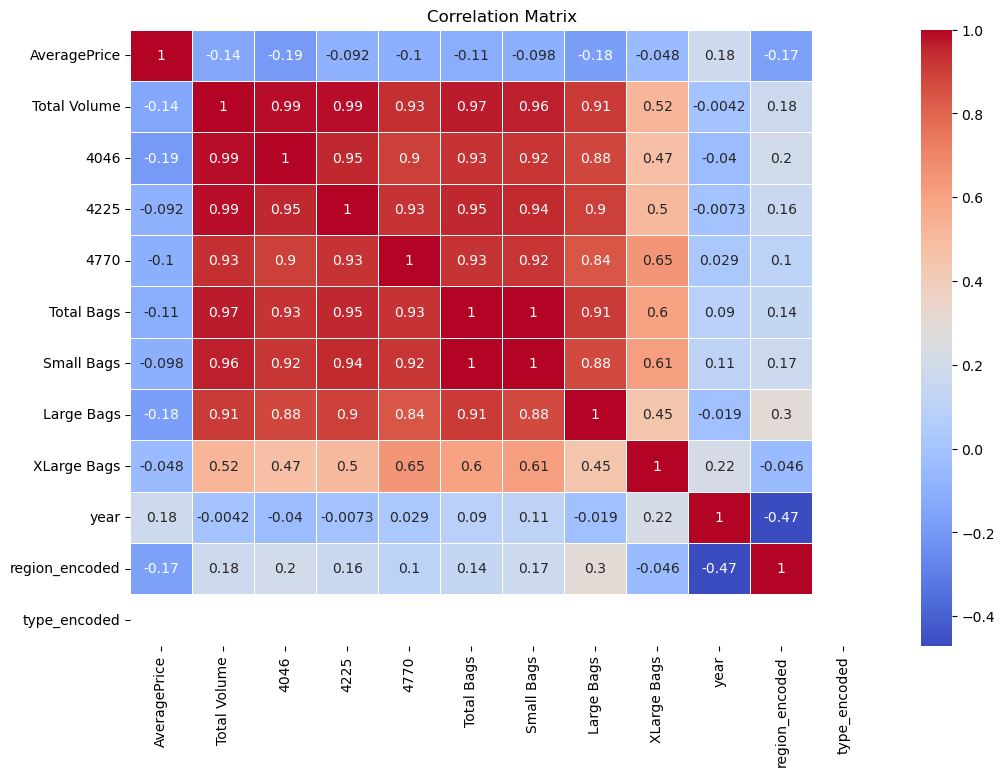

In [42]:
# Correlation matrix to see relationships between features and the target
plt.figure(figsize=(12, 8))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [43]:
data_cleaned.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region_encoded,type_encoded
count,16468.000000,1.646800e+04,1.646800e+04,1.646800e+04,1.646800e+04,1.646800e+04,1.517000e+03,1.517000e+03,1517.000000,1517.000000,16468.000000,16468.0
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,7.399866,0.0
std,0.057313,1.345098e+06,5.909424e+05,5.075910e+05,4.180541e+04,2.299843e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,6.578320,0.0
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,0.000000,0.0
25%,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.972722e+04,5.407400e+02,0.000000,2015.000000,6.000000,0.0
50%,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,0.0
75%,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,6.000000,0.0
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,50.000000,0.0


In [44]:
data_cleaned = data_cleaned.dropna(axis=1)  # Drops any rows with NaN values


In [45]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

## Regression Model

In [46]:
# Features and target for regression
X_reg = data_cleaned.drop(columns=['AveragePrice', 'type_encoded'])
y_reg = data_cleaned['AveragePrice']

In [47]:
# Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [48]:
# Train Random Forest Regressor
reg = RandomForestRegressor()
reg.fit(X_train_reg, y_train_reg)

RandomForestRegressor()

In [49]:
# Make predictions
y_pred_reg = reg.predict(X_test_reg)
y_pred_reg

array([1.07499011, 1.07499011, 1.07499011, ..., 1.07499011, 1.07499011,
       1.07499011])

In [50]:
# Check Mean Squared Error
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f'Regression Mean Squared Error: {mse}')

Regression Mean Squared Error: 0.0006917734024998675


In [51]:
# Calculate Mean Squared Error (MSE) and R-squared (R2) for evaluation
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0006917734024998675
R-squared: 0.7755161149741445


In [52]:
cv_scores = cross_val_score(reg, X_train_reg, y_train_reg, cv=5)

print(f'Cross-validation scores: {cv_scores}')
print(f'Average Cross-validation score: {np.mean(cv_scores)}\n')

Cross-validation scores: [0.76139807 0.80592077 0.7895745  0.67822139 0.82385136]
Average Cross-validation score: 0.7717932184687758



In [53]:
#Hyperparameter tuning on RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_reg, y_train_reg)

# Best parameters and model performance
print(f'Best parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

# Evaluate tuned model
y_pred_best = best_model.predict(X_test_reg)
mse_best = mean_squared_error(y_test_reg, y_pred_best)
r2_best = r2_score(y_test_reg, y_pred_best)

print(f'Best model MSE: {mse_best}')
print(f'Best model R2 Score: {r2_best}')


Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best model MSE: 0.000679058558774038
Best model R2 Score: 0.7796421445479274


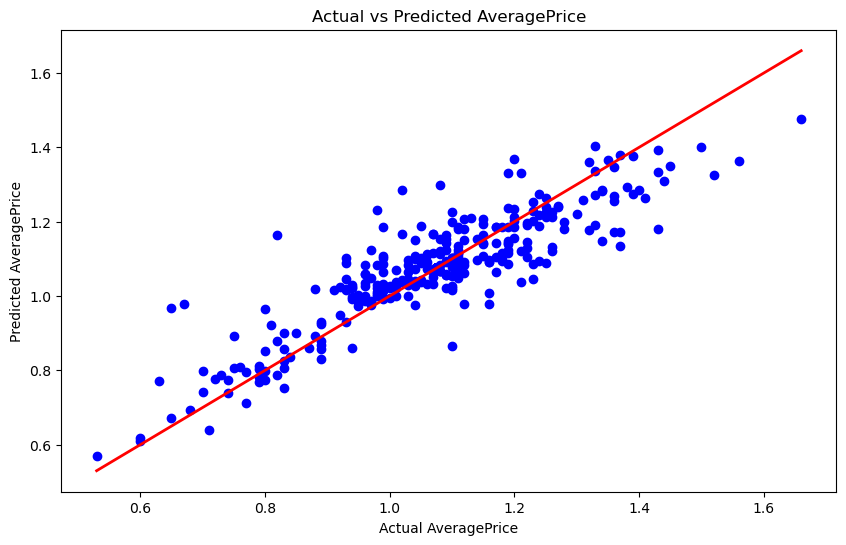

In [54]:
# Plot the actual vs predicted wins
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, color='blue')
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linewidth=2)  # Diagonal line
plt.title("Actual vs Predicted AveragePrice")
plt.xlabel("Actual AveragePrice")
plt.ylabel("Predicted AveragePrice")
plt.show()

## Classification Model

In [55]:
# Features and target for classification
X_class = data_cleaned.drop(columns=['AveragePrice', 'region_encoded'])
y_class = data_cleaned['region_encoded']

In [56]:
# Split data into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [57]:
# Train a simple Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train_class, y_train_class)

RandomForestClassifier()

In [58]:
# Make predictions
y_pred_class = clf.predict(X_test_class)
y_pred_class

array([6, 6, 6, ..., 6, 6, 6], dtype=int64)

In [59]:
# Check accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Classification Accuracy: {accuracy}')

Classification Accuracy: 0.9924104432301154


In [61]:
#Hyperparameter tuning on RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_class, y_train_class)

# Best parameters and model performance
print(f'Best parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

# Evaluate tuned model
y_pred_best = best_model.predict(X_test_class)
acc_best = accuracy_score(y_test_class, y_pred_best)

print(f'Best model Accuracy: {acc_best}')

Best parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}
Best model Accuracy: 0.9927140255009107


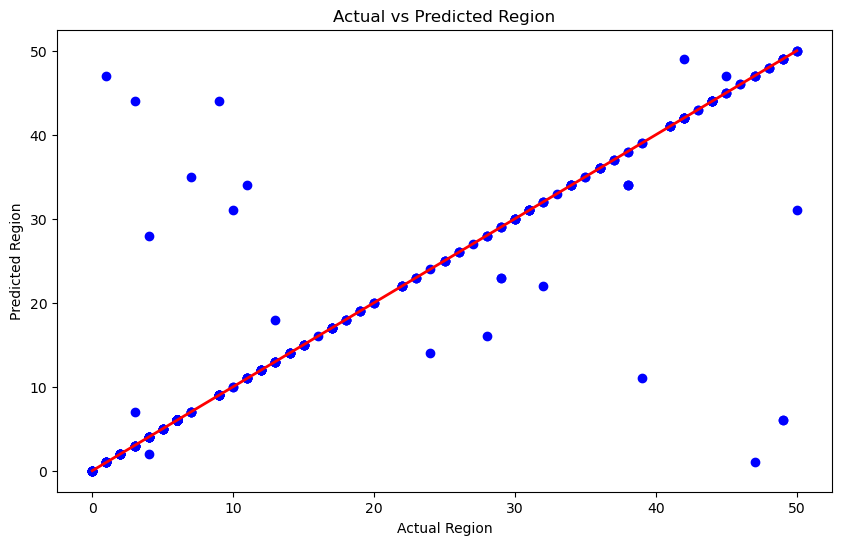

In [60]:
# Plot the actual vs predicted wins
plt.figure(figsize=(10, 6))
plt.scatter(y_test_class, y_pred_class, color='blue')
plt.plot([min(y_test_class), max(y_test_class)], [min(y_test_class), max(y_test_class)], color='red', linewidth=2)  # Diagonal line
plt.title("Actual vs Predicted Region")
plt.xlabel("Actual Region")
plt.ylabel("Predicted Region")
plt.show()

# Avocado Price and Region Prediction Project

## 1. Introduction

This project aims to analyze avocado prices and predict avocado regions using machine learning techniques. The dataset provides information on avocado prices and other relevant features, and we will build both regression and classification models to gain insights and make predictions.

## 2. Data Description

The dataset includes:
- **AveragePrice**: The average price of avocados.
- **Total Volume**: Total number of avocados sold.
- **4046, 4225, 4770**: Number of avocados sold in different size categories.
- **Total Bags**: Total number of bags sold.
- **type**: Type of avocado (conventional or organic).
- **region**: Region where the avocados were sold.
- **Date**: Date of the observation.

## 3. Data Preprocessing

### 3.1 Data Cleaning
- **Missing Values**: 
  - Numerical columns (`AveragePrice`, `Total Volume`, `4046`, `4225`, `4770`, `Total Bags`) are filled with their mean values.
  - Categorical columns (`type`, `region`) are filled with their mode values.
  
### 3.2 Exploratory Data Analysis (EDA)
- **Correlation Matrix**: Visualized to understand relationships between features and the target.

### 3.3 Finding and Treating Outliers
- No specific outlier treatment was performed in this notebook.

### 3.4 Feature Encoding and Selection
- **Encoded Variables**:
  - `region` is encoded into `region_encoded`.
  - `type` is encoded into `type_encoded`.
- **Dropped Columns**: `Date`, `type`, `region`, and `Unnamed: 0` are dropped from the dataset.

## 4. Model Building

### 4.1 Regression Model

**Objective**: Predict the average price of avocados.

- **Features and Target**:
  - **Features**: All columns except `AveragePrice` and `type_encoded`.
  - **Target**: `AveragePrice`
  
- **Model**: Random Forest Regressor

- **Evaluation**:
  - Mean Squared Error (MSE)
  - R-squared (R²)
  - Cross-Validation Scores

- **Hyperparameter Tuning**: 
  - Optimized using GridSearchCV to find the best parameters for `n_estimators`, `max_depth`, and `min_samples_split`.

- **Results**:
  - Best model performance metrics are reported.

- **Visualization**: Actual vs Predicted Average Price scatter plot.

### 4.2 Classification Model

**Objective**: Predict the avocado region.

- **Features and Target**:
  - **Features**: All columns except `AveragePrice` and `region_encoded`.
  - **Target**: `region_encoded`
  
- **Model**: Random Forest Classifier

- **Evaluation**:
  - Accuracy Score

- **Hyperparameter Tuning**: 
  - Optimized using GridSearchCV to find the best parameters for `n_estimators`, `max_depth`, and `min_samples_split`.

- **Results**:
  - Best model accuracy is reported.

- **Visualization**: Actual vs Predicted Region scatter plot.

## 5. Findings

### 5.1 Regression Model
- **Best Model**: Random Forest Regressor
- **Performance Metrics**: 
  - Mean Squared Error: 0.000679058558774038
  - R-squared: 0.7796421445479274 
  
### 5.2 Classification Model
- **Best Model**: Random Forest Classifier
- **Performance Metrics**:
  - Accuracy: 0.9927140255009107

## 6. Conclusion

The Random Forest models performed well for both regression and classification tasks. The regression model effectively predicted avocado prices, while the classification model accurately predicted the region. These models can be useful for business decisions regarding pricing and regional market analysis.
